# **MINE4201 - Taller 1**



## **1. Librerias e imports**

In [632]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

## **2. Carga de archivos**

In [633]:
ratings=pd.read_csv('./data/rating.csv', sep = ',', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ], skiprows=1)

In [634]:
movies=pd.read_csv('./data/movie.csv', sep = ',', names = [ "movieId","title","genres" ],skiprows=1 )

In [635]:
tags=pd.read_csv('./data/tag.csv', sep = ',', names = [ "userId","movieId","tag","timestamp" ],skiprows=1)

### **2.1 Verificación que los archivos se han cargado correctamente**

In [636]:
ratings.head()

,user_id,item_id,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [637]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [638]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


## **3. Conocimiento del dataset**



### **3.1 Completitud en el dataset**

In [639]:
ratings_null=ratings.isnull().sum()
movies_null=movies.isnull().sum()
tags_null=tags.isnull().sum()

ratings_null, movies_null, tags_null

(user_id      0
 item_id      0
 rating       0
 timestamp    0
 dtype: int64,
 movieId    0
 title      0
 genres     0
 dtype: int64,
 userId        0
 movieId       0
 tag          16
 timestamp     0
 dtype: int64)

### **Identificación valores únicos**

In [640]:
#contar valores unicos en tags
tags['tag'].nunique()

38643

In [641]:
#número de peliculas en el dataset
movies['title'].nunique()

27262

In [642]:
#número de usuarios en el dataset
ratings['user_id'].nunique()

138493

### **3.2 Distribuciones**

**Distribución de ratings**

Text(0.5, 1.0, 'Distribución de ratings totales por rating')

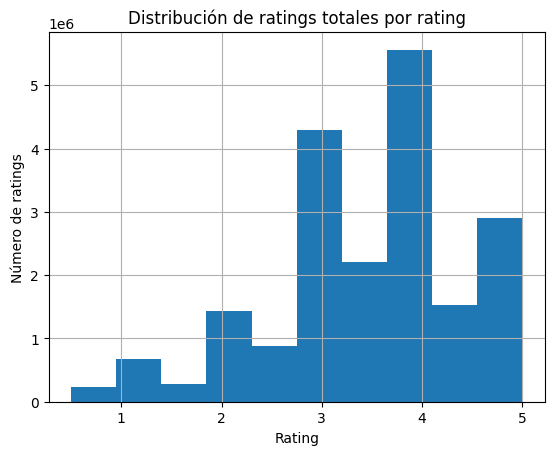

In [643]:
plot = ratings.rating.hist()
plot.set_ylabel("Número de ratings")
plot.set_xlabel("Rating")
plot.set_title('Distribución de ratings totales por rating')

**Distribución de número deratings por usuarios**

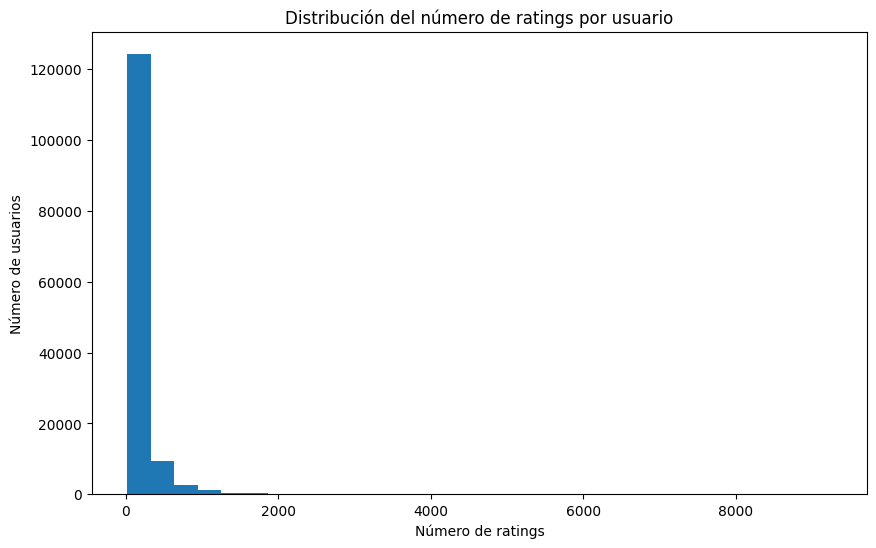

In [644]:
distribucion_count = ratings.groupby('user_id')['rating'].count()
plt.figure(figsize=(10, 6))
plt.hist(distribucion_count, bins=30)
plt.xlabel('Número de ratings')
plt.ylabel('Número de usuarios')
plt.title('Distribución del número de ratings por usuario')
plt.show()

**Distribución del promedio de calificación por usuario**

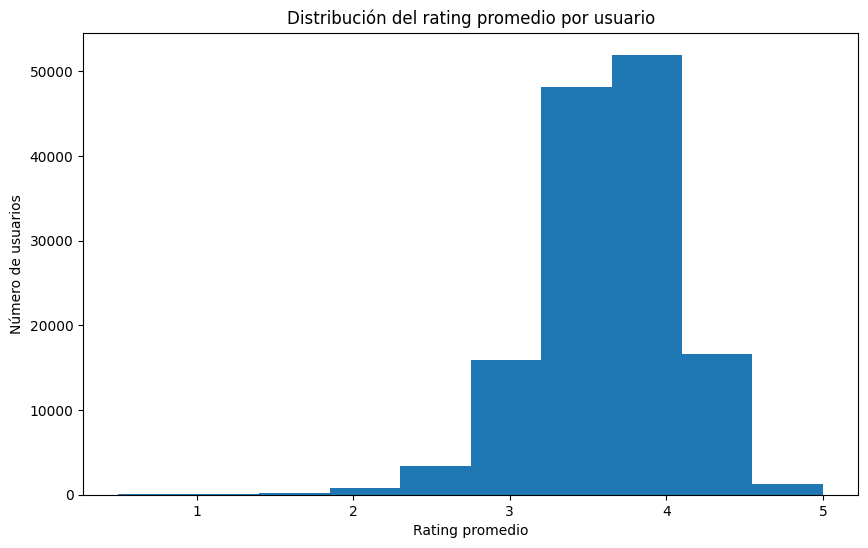

In [645]:
distribucion_mean = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.hist(distribucion_mean, bins=10)
plt.xlabel('Rating promedio')
plt.ylabel('Número de usuarios')
plt.title('Distribución del rating promedio por usuario')
plt.show()

### **3.3 Muestreo Estratificado**

Para asegurar que la muestra tomada cuente con  una proprocion similar de los ratings con respecto al dataset original, se va a utilizar el muestreo estratificado.

In [646]:
from sklearn.model_selection import train_test_split
ratings_sample, discarded = train_test_split(ratings, test_size=0.85, stratify=ratings["rating"], random_state=42)

ratings_sample

,user_id,item_id,rating,timestamp
17040836,117902,110,2.0,2005-03-22 07:29:02
6194541,42627,1541,5.0,1998-07-04 21:37:49
15732764,108796,1265,4.0,2000-01-11 19:26:02
12932695,89307,188,2.0,2005-03-25 23:37:40
3926049,26813,1974,3.5,2004-02-24 19:32:48
...,...,...,...,...
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01
9943379,68710,2478,4.0,2006-12-09 16:24:48
3903829,26626,1374,3.5,2005-11-22 17:15:39


### Filtramos la cantidad de peliculas para tener un dataset más pequeño y poder realizar la construcción de los modelos

In [647]:
movies_sample = movies.head(14000)

movies_sample

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
13995,70183,"Ugly Truth, The (2009)",Comedy|Drama|Romance
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,Drama
13997,70188,Wild River (1960),Drama|Romance
13998,70197,My First War (2008),Documentary


In [648]:
selected_movie_ids = movies_sample["movieId"].unique()
ratings_sample = ratings_sample[ratings_sample["item_id"].isin(selected_movie_ids)]

ratings_sample

,user_id,item_id,rating,timestamp
17040836,117902,110,2.0,2005-03-22 07:29:02
6194541,42627,1541,5.0,1998-07-04 21:37:49
15732764,108796,1265,4.0,2000-01-11 19:26:02
12932695,89307,188,2.0,2005-03-25 23:37:40
3926049,26813,1974,3.5,2004-02-24 19:32:48
...,...,...,...,...
10473231,72434,1049,5.0,1997-06-21 10:17:48
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01
9943379,68710,2478,4.0,2006-12-09 16:24:48


Text(0.5, 1.0, 'Distribución del sample de ratings totales por rating')

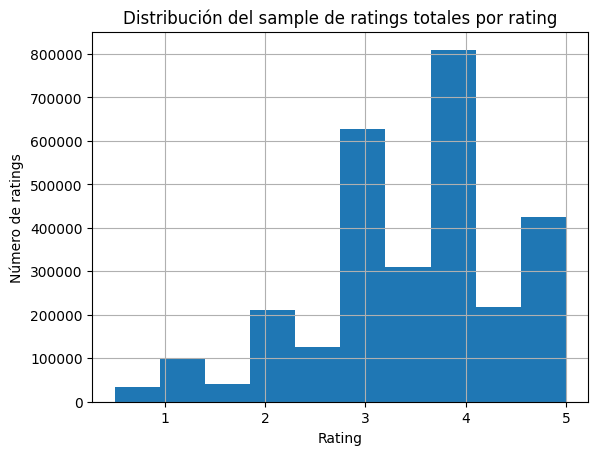

In [649]:
plot = ratings_sample.rating.hist()
plot.set_ylabel("Número de ratings")
plot.set_xlabel("Rating")
plot.set_title('Distribución del sample de ratings totales por rating')

Se evidencia que los ratings de la muestra tienen una distribución muy similar a la del data set original.

In [650]:
print("Número de registros")
print("sample: " + str(len(ratings_sample)))
print("real: " + str(len(ratings)))

Número de registros
sample: 2900659
real: 20000263


In [651]:
print("Número de registros")
print("sample: " + str(len(movies_sample)))
print("real: " + str(len(movies)))

Número de registros
sample: 14000
real: 27278


### **3.4 Exploración de métricas por pelicula**

**Número de ratings por items, el promedio de sus calificaciones y la varianza de sus calificaciones**

In [652]:
ratings_sample

,user_id,item_id,rating,timestamp
17040836,117902,110,2.0,2005-03-22 07:29:02
6194541,42627,1541,5.0,1998-07-04 21:37:49
15732764,108796,1265,4.0,2000-01-11 19:26:02
12932695,89307,188,2.0,2005-03-25 23:37:40
3926049,26813,1974,3.5,2004-02-24 19:32:48
...,...,...,...,...
10473231,72434,1049,5.0,1997-06-21 10:17:48
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01
9943379,68710,2478,4.0,2006-12-09 16:24:48


In [653]:
ratings_agg = ratings_sample.groupby('item_id')['rating'].agg(['count', 'mean', 'var'])
ratings_agg = ratings_agg.join(movies.set_index('movieId')['title'], on='item_id', how='left')

In [654]:
ratings_agg

,count,mean,var,title
item_id,,,,
1,7543,3.915286,0.782732,Toy Story (1995)
2,3353,3.191918,0.908637,Jumanji (1995)
3,1891,3.150714,1.045792,Grumpier Old Men (1995)
4,423,2.828605,1.126360,Waiting to Exhale (1995)
5,1862,3.062299,0.932979,Father of the Bride Part II (1995)
...,...,...,...,...
70183,116,3.176724,1.218497,"Ugly Truth, The (2009)"
70186,2,4.250000,1.125000,Heimat - A Chronicle of Germany (Heimat - Eine...
70188,5,3.700000,0.825000,Wild River (1960)


**Peliculas con más calificaciones**

In [655]:
mt=ratings_sample.groupby('item_id')['rating'].agg({'count','mean','var'}).join(movies_sample['title'], how='left')
mt[:10]

,var,mean,count,title
item_id,,,,
1,0.782732,3.915286,7543,Jumanji (1995)
2,0.908637,3.191918,3353,Grumpier Old Men (1995)
3,1.045792,3.150714,1891,Waiting to Exhale (1995)
4,1.126360,2.828605,423,Father of the Bride Part II (1995)
5,0.932979,3.062299,1862,Heat (1995)
6,0.743458,3.856453,3626,Sabrina (1995)
7,0.904576,3.358537,2050,Tom and Huck (1995)
8,0.771175,3.227876,226,Sudden Death (1995)
9,0.822684,2.987433,557,GoldenEye (1995)


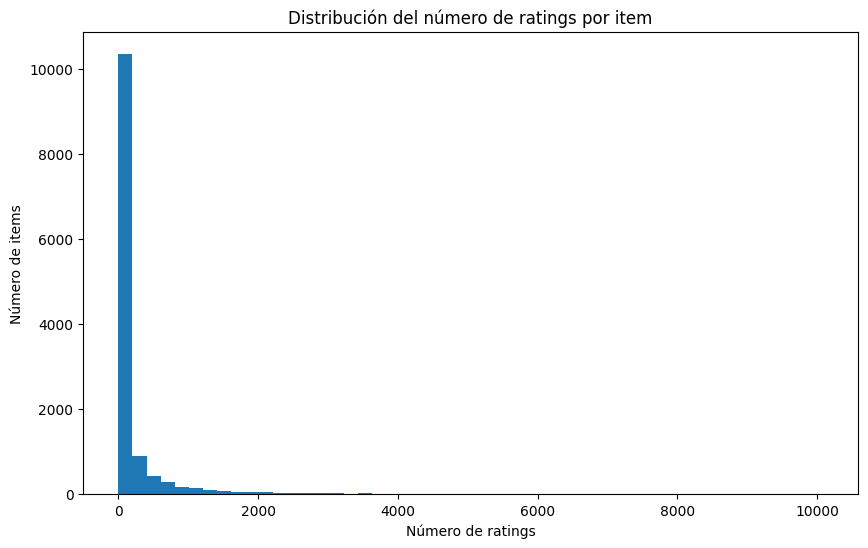

In [656]:
plt.figure(figsize=(10, 6))
plt.hist(mt["count"], bins=50)
plt.xlabel('Número de ratings')
plt.ylabel('Número de items')
plt.title('Distribución del número de ratings por item')
plt.show()

### **3.5 Conclusiones**
- Los datasets que se van a usar para el taller son: movies y ratings, ya que con estos contienen la información fundamental para generar los modelos colaborativos.
- La muestra se hizo con el 20% de los datos, para tener una muetsra significativa con la misma distribución de los dataset original.
- La distribución de número de ratings por item indican que pocas películas son muy vistas y calificadas, mientras que muchas otras reciben pocas calificaciones (tiene una distribución long-tail)
- La mayoría de los usuarios califican con valores cercanos a 4 y 5, lo que sugiere que la mayoría de las calificaciones son positivas. La mayoría de los usuarios dan ratings con un promedio cercano a 4, y muy pocos usuarios califican con promedios bajos.
- La mayoría de los usuarios califican pocas películas, mientras que unos pocos usuarios califican muchas.


## **4. Pre-procesamiento de datos**

### **4.1 One hot encode para géneros**

Es necesario procesar el genero de las peliculas, haciendo one hot encode con el fin que se pueda procesar en los modelos de predicción y se pueda procesar esta información de las peliculas de manera adecuada.

In [657]:
movies_sample.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [658]:
all_genres = set()
for genres in movies_sample['genres']:
  all_genres.update(genres.split('|'))

for genre in all_genres:
  movies_sample[genre] = movies_sample['genres'].apply(lambda x: 1 if genre in x else 0)

movies_sample = movies_sample.drop('genres', axis=1)
movies_sample.head()

C:\Users\dania\AppData\Local\Temp\ipykernel_15256\3408665314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_sample[genre] = movies_sample['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dania\AppData\Local\Temp\ipykernel_15256\3408665314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_sample[genre] = movies_sample['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\dania\AppData\Local\Temp\ipykernel_15256\3408665314.py:6: SettingWithCopyWarning: 
A value is trying to

,movieId,title,Romance,Crime,Mystery,War,Horror,Children,Sci-Fi,Musical,...,Film-Noir,IMAX,Thriller,Western,Fantasy,Comedy,Adventure,Drama,Documentary,Action
0,1,Toy Story (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0
1,2,Jumanji (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3,Grumpier Old Men (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [659]:
print("Número de géneros: " + str(len(all_genres)))

Número de géneros: 19


In [660]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Creamos un dataframe con los géneros y asignamos un id a cada uno

In [661]:
df_genres = pd.DataFrame(list(all_genres), columns=['genre'])

df_genres['id'] = range(1, len(df_genres) + 1)

df_genres

,genre,id
0,Romance,1
1,Crime,2
2,Mystery,3
3,War,4
4,Horror,5
5,Children,6
6,Sci-Fi,7
7,Musical,8
8,Animation,9
9,Film-Noir,10


### Generamos un dataframe en forma de (genre_id, movie_id)

In [662]:
melted_df = movies_sample.melt(id_vars=['movieId', 'title'], var_name='genre', value_name='is_present')

filtered_df = melted_df[melted_df['is_present'] == 1].drop(columns=['is_present', 'title'])

# Merge with genres_df to get genre_id instead of genre names
many_to_many_df = filtered_df.merge(df_genres, left_on='genre', right_on='genre').drop(columns=['genre'])

# Rename columns to match the expected output
genre_movie_df = many_to_many_df.rename(columns={'id': 'genre_id'})

genre_movie_df

,movieId,genre_id
0,3,1
1,4,1
2,7,1
3,11,1
4,15,1
...,...,...
29160,69947,19
29161,69964,19
29162,70050,19
29163,70064,19


### Ahora obtenemos un dataframe con todos los usuarios y creamos su password

In [663]:
ratings_sample

,user_id,item_id,rating,timestamp
17040836,117902,110,2.0,2005-03-22 07:29:02
6194541,42627,1541,5.0,1998-07-04 21:37:49
15732764,108796,1265,4.0,2000-01-11 19:26:02
12932695,89307,188,2.0,2005-03-25 23:37:40
3926049,26813,1974,3.5,2004-02-24 19:32:48
...,...,...,...,...
10473231,72434,1049,5.0,1997-06-21 10:17:48
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01
9943379,68710,2478,4.0,2006-12-09 16:24:48


### Filtramos el dataset para contar con menos registros - dado su complejidad (10000) users

In [664]:
user_rating_counts = ratings_sample["user_id"].value_counts()

top_10000_users = user_rating_counts.head(10000)

total_ratings_10000_users = top_10000_users.sum()

total_ratings_10000_users

1111470

In [665]:
top_10000_users_ids = top_10000_users.index

top_10000_users_ids

Index([118205,   8405,  82418,  83090, 125794,  34576,  74142,  92011,  79159,
       121535,
       ...
       120888,  94484,  45971,  67043,  41273,  83636,  36337,  18310, 118178,
       129630],
      dtype='int64', name='user_id', length=10000)

In [666]:
ratings_sample = ratings_sample[ratings_sample["user_id"].isin(top_10000_users_ids)]

ratings_sample

,user_id,item_id,rating,timestamp
12932695,89307,188,2.0,2005-03-25 23:37:40
9150395,63226,2692,4.0,2000-06-09 20:27:54
1618681,10931,2058,5.0,2008-01-28 19:00:19
1725157,11668,3910,4.5,2005-06-02 11:32:26
12736246,88015,1147,3.5,2008-02-18 06:39:40
...,...,...,...,...
4724220,32433,1727,3.0,2001-07-16 19:11:50
60063,424,2469,3.5,2004-11-10 04:10:41
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01


In [667]:
top_1000_users_df = top_1000_users.reset_index()

top_1000_users_df.columns = ["user_id", "total_ratings"]

top_1000_users_df = top_1000_users_df.drop(columns=["total_ratings"])

top_1000_users_df

,user_id
0,118205
1,8405
2,82418
3,83090
4,125794
...,...
9995,83636
9996,36337
9997,18310
9998,118178


In [668]:
df_unique_users = top_1000_users_df

df_unique_users['password'] = df_unique_users['user_id'].apply(lambda x: f'password{str(x)}')

df_unique_users = df_unique_users.sort_values(by="user_id", ascending=True) 

df_unique_users

,user_id,password
7241,11,password11
6676,24,password24
3586,54,password54
4075,58,password58
4819,91,password91
...,...,...
5233,138406,password138406
3975,138411,password138411
4571,138437,password138437
8976,138456,password138456


In [669]:
# import tmdbsimple as tmdb

# tmdb.API_KEY = ''

# link_df = pd.read_csv('./data/link.csv', sep = ',')
# link_df = link_df.replace([np.inf, -np.inf], np.nan)
# link_df = link_df.dropna(subset=["tmdbId"])
# link_df["tmdbId"] = link_df["tmdbId"].astype(int)

# imdb_lookup = link_df.set_index("movieId")["tmdbId"].to_dict()

# imdb_lookup

In [670]:
# def get_movie_poster_url(movie_id):
#     try:
#         movie_id = int(movie_id)
#         imdb_id = imdb_lookup.get(movie_id, None)
#         movie = tmdb.Movies(imdb_id)
#         response = movie.info()
        
#         # Get poster URL
#         poster_path = response.get("poster_path", None)
#         poster_url = f"https://image.tmdb.org/t/p/w500{poster_path}" if poster_path else None
#         return poster_url
#     except Exception as e:
#         print(f"Error fetching poster for movie_id {movie_id}: {e}")
#         return None

In [671]:
# movies_sample[["image_url"]] = movies_sample["movieId"].apply(lambda x: pd.Series(get_movie_poster_url(int(x))))

# movies_sample

In [672]:
movies_sample_copy = movies_sample

### Ahora calculamos el promedio ponderado por pelicula

In [673]:
average_ratings = ratings_sample.groupby("item_id")["rating"].mean().reset_index()

movies_sample = movies_sample.merge(average_ratings, left_on="movieId", right_on="item_id", how="left")

movies_sample = movies_sample.rename(columns={"rating": "average_rating"}).drop(columns=["item_id"])

movies_sample

,movieId,title,Romance,Crime,Mystery,War,Horror,Children,Sci-Fi,Musical,...,IMAX,Thriller,Western,Fantasy,Comedy,Adventure,Drama,Documentary,Action,average_rating
0,1,Toy Story (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,3.878399
1,2,Jumanji (1995),0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,2.937705
2,3,Grumpier Old Men (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.864066
3,4,Waiting to Exhale (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2.585470
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.669014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,70183,"Ugly Truth, The (2009)",1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2.991667
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
13997,70188,Wild River (1960),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.700000
13998,70197,My First War (2008),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.500000


In [674]:
selected_columns = ["movieId", "title", "average_rating"]

movie_sample_selected = movies_sample[selected_columns]

movie_sample_selected

,movieId,title,average_rating
0,1,Toy Story (1995),3.878399
1,2,Jumanji (1995),2.937705
2,3,Grumpier Old Men (1995),2.864066
3,4,Waiting to Exhale (1995),2.585470
4,5,Father of the Bride Part II (1995),2.669014
...,...,...,...
13995,70183,"Ugly Truth, The (2009)",2.991667
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,NaN
13997,70188,Wild River (1960),3.700000
13998,70197,My First War (2008),3.500000


In [675]:
movie_sample_renamed = movie_sample_selected.rename(columns={"movieId": "id", "average_rating": "avg_rating"})

movie_sample_renamed

,id,title,avg_rating
0,1,Toy Story (1995),3.878399
1,2,Jumanji (1995),2.937705
2,3,Grumpier Old Men (1995),2.864066
3,4,Waiting to Exhale (1995),2.585470
4,5,Father of the Bride Part II (1995),2.669014
...,...,...,...
13995,70183,"Ugly Truth, The (2009)",2.991667
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,NaN
13997,70188,Wild River (1960),3.700000
13998,70197,My First War (2008),3.500000


In [676]:
# Check for URLs in the movie file
movie_stored = pd.read_csv("./data/processed/movies.csv")
movies_joined_url = movie_sample_renamed.merge(
        movie_stored[['id', 'image_url']], 
        on="id",
        how="left"
    )

movie_sample_renamed = movies_joined_url

movie_sample_renamed

,id,title,avg_rating,image_url
0,1,Toy Story (1995),3.878399,https://image.tmdb.org/t/p/w500/uXDfjJbdP4ijW5...
1,2,Jumanji (1995),2.937705,https://image.tmdb.org/t/p/w500/p67m5dzwyxWd46...
2,3,Grumpier Old Men (1995),2.864066,https://image.tmdb.org/t/p/w500/1FSXpj5e8l4KH6...
3,4,Waiting to Exhale (1995),2.585470,https://image.tmdb.org/t/p/w500/qJU6rfil5xLVb5...
4,5,Father of the Bride Part II (1995),2.669014,https://image.tmdb.org/t/p/w500/rj4LBtwQ0uGrpB...
...,...,...,...,...
13995,70183,"Ugly Truth, The (2009)",2.991667,https://image.tmdb.org/t/p/w500/2rq96Ihbqb1eU3...
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,NaN,NaN
13997,70188,Wild River (1960),3.700000,https://image.tmdb.org/t/p/w500/AfwbHDtdt4kdbs...
13998,70197,My First War (2008),3.500000,NaN


In [677]:
df_genres

,genre,id
0,Romance,1
1,Crime,2
2,Mystery,3
3,War,4
4,Horror,5
5,Children,6
6,Sci-Fi,7
7,Musical,8
8,Animation,9
9,Film-Noir,10


In [678]:
ratings_sample

,user_id,item_id,rating,timestamp
12932695,89307,188,2.0,2005-03-25 23:37:40
9150395,63226,2692,4.0,2000-06-09 20:27:54
1618681,10931,2058,5.0,2008-01-28 19:00:19
1725157,11668,3910,4.5,2005-06-02 11:32:26
12736246,88015,1147,3.5,2008-02-18 06:39:40
...,...,...,...,...
4724220,32433,1727,3.0,2001-07-16 19:11:50
60063,424,2469,3.5,2004-11-10 04:10:41
1880516,12719,6380,4.0,2007-11-23 16:56:25
8654690,59781,8361,3.0,2010-04-28 23:40:01


In [679]:
ratings_sample_renamed = ratings_sample.rename(columns={"item_id": "movie_id"})

ratings_sample_renamed = ratings_sample_renamed.drop(columns=["timestamp"])

ratings_sample_renamed = ratings_sample_renamed.sort_index()

ratings_sample_renamed

,user_id,movie_id,rating
988,11,364,4.0
992,11,384,3.5
1002,11,541,4.5
1014,11,610,4.0
1025,11,780,5.0
...,...,...,...
19998230,138474,3421,5.0
19998231,138474,3437,4.0
19998233,138474,3440,4.0
19998257,138474,3773,4.0


In [680]:
df_genres_renamed = df_genres.rename(columns={"genre": "name"})

df_genres_renamed

,name,id
0,Romance,1
1,Crime,2
2,Mystery,3
3,War,4
4,Horror,5
5,Children,6
6,Sci-Fi,7
7,Musical,8
8,Animation,9
9,Film-Noir,10


In [681]:
genre_movie_renamed = genre_movie_df.reset_index().rename(columns={'index': 'id', 'movieId': 'movie_id'})

genre_movie_renamed

,id,movie_id,genre_id
0,0,3,1
1,1,4,1
2,2,7,1
3,3,11,1
4,4,15,1
...,...,...,...
29160,29160,69947,19
29161,29161,69964,19
29162,29162,70050,19
29163,29163,70064,19


In [682]:
ratings_sample_renamed = ratings_sample_renamed.reset_index().rename(columns={'index': 'id'})
ratings_sample_renamed

,id,user_id,movie_id,rating
0,988,11,364,4.0
1,992,11,384,3.5
2,1002,11,541,4.5
3,1014,11,610,4.0
4,1025,11,780,5.0
...,...,...,...,...
1111465,19998230,138474,3421,5.0
1111466,19998231,138474,3437,4.0
1111467,19998233,138474,3440,4.0
1111468,19998257,138474,3773,4.0


In [683]:
user_example = pd.read_csv("./data/user_example.csv")

user_example

,id,password,last_login,is_superuser,username,first_name,last_name,email,is_staff,is_active,date_joined
0,1,pbkdf2_sha256$870000$Gt7I9hIQhoLAtrs6OEWIbq$om...,NaN,f,1,NaN,NaN,NaN,f,t,2025-03-10 21:05:49.459303-05


In [684]:
def assign_date():
    return user_example["date_joined"]

In [685]:
df_unique_users_rename = df_unique_users.rename(columns={"user_id": "id"})

df_unique_users_rename["last_login"] = np.NaN

df_unique_users_rename["first_name"] = ""

df_unique_users_rename["last_name"] = ""

df_unique_users_rename["email"] = ""

df_unique_users_rename["username"] = df_unique_users_rename["id"]

df_unique_users_rename["is_superuser"] = False

df_unique_users_rename["is_staff"] = False

df_unique_users_rename["is_active"] = True

df_unique_users_rename["date_joined"] = ""

df_unique_users_rename["date_joined"] = df_unique_users_rename["date_joined"].apply(lambda x: assign_date())

df_unique_users_rename

,id,password,last_login,first_name,last_name,email,username,is_superuser,is_staff,is_active,date_joined
7241,11,password11,NaN,,,,11,False,False,True,2025-03-10 21:05:49.459303-05
6676,24,password24,NaN,,,,24,False,False,True,2025-03-10 21:05:49.459303-05
3586,54,password54,NaN,,,,54,False,False,True,2025-03-10 21:05:49.459303-05
4075,58,password58,NaN,,,,58,False,False,True,2025-03-10 21:05:49.459303-05
4819,91,password91,NaN,,,,91,False,False,True,2025-03-10 21:05:49.459303-05
...,...,...,...,...,...,...,...,...,...,...,...
5233,138406,password138406,NaN,,,,138406,False,False,True,2025-03-10 21:05:49.459303-05
3975,138411,password138411,NaN,,,,138411,False,False,True,2025-03-10 21:05:49.459303-05
4571,138437,password138437,NaN,,,,138437,False,False,True,2025-03-10 21:05:49.459303-05
8976,138456,password138456,NaN,,,,138456,False,False,True,2025-03-10 21:05:49.459303-05


In [686]:
null_rows = movie_sample_renamed[movie_sample_renamed["avg_rating"].isna()]

null_rows

,id,title,avg_rating,image_url
131,133,Nueba Yol (1995),NaN,NaN
635,642,Roula (1995),NaN,NaN
663,672,Tarantella (1995),NaN,https://image.tmdb.org/t/p/w500/smutDepG3PYjKm...
667,676,They Bite (1996),NaN,https://image.tmdb.org/t/p/w500/eIm9qNAZdDpwTy...
687,699,To Cross the Rubicon (1991),NaN,NaN
...,...,...,...,...
13986,70146,Rage at Dawn (1955),NaN,NaN
13987,70148,Paradise Canyon (1935),NaN,NaN
13988,70152,"Perfect Fake, A (2005)",NaN,https://image.tmdb.org/t/p/w500/sGznJr8ITgoCf8...
13989,70155,Seven Years Bad Luck (1921),NaN,NaN


In [687]:
movie_sample_renamed["avg_rating"] = movie_sample_renamed["avg_rating"].fillna(0)

movie_sample_renamed

,id,title,avg_rating,image_url
0,1,Toy Story (1995),3.878399,https://image.tmdb.org/t/p/w500/uXDfjJbdP4ijW5...
1,2,Jumanji (1995),2.937705,https://image.tmdb.org/t/p/w500/p67m5dzwyxWd46...
2,3,Grumpier Old Men (1995),2.864066,https://image.tmdb.org/t/p/w500/1FSXpj5e8l4KH6...
3,4,Waiting to Exhale (1995),2.585470,https://image.tmdb.org/t/p/w500/qJU6rfil5xLVb5...
4,5,Father of the Bride Part II (1995),2.669014,https://image.tmdb.org/t/p/w500/rj4LBtwQ0uGrpB...
...,...,...,...,...
13995,70183,"Ugly Truth, The (2009)",2.991667,https://image.tmdb.org/t/p/w500/2rq96Ihbqb1eU3...
13996,70186,Heimat - A Chronicle of Germany (Heimat - Eine...,0.000000,NaN
13997,70188,Wild River (1960),3.700000,https://image.tmdb.org/t/p/w500/AfwbHDtdt4kdbs...
13998,70197,My First War (2008),3.500000,NaN


In [688]:
# Order columns to export easier
df_genres_renamed = df_genres_renamed[["id", "name"]]
movie_sample_renamed = movie_sample_renamed[["id", "title", "image_url", "avg_rating"]]
genre_movie_renamed = genre_movie_renamed[["id", "genre_id", "movie_id"]]
ratings_sample_renamed = ratings_sample_renamed[["id", "rating", "movie_id", "user_id"]]
df_unique_users_rename = df_unique_users_rename[["id", "password", "last_login", "is_superuser", "username", "first_name", "last_name", "email", "is_staff", "is_active", "date_joined"]]

### Exportamos los archivos para poblar la db

In [689]:
df_genres_renamed.to_csv("./data/processed/genre.csv", index=False)

In [690]:
movie_sample_renamed.to_csv("./data/processed/movies.csv", index=False)

In [691]:
genre_movie_renamed.to_csv("./data/processed/movie_genre.csv", index=False)

In [692]:
ratings_sample_renamed.to_csv("./data/processed/movie_ratings.csv", index=False)

In [693]:
df_unique_users_rename.to_csv("./data/processed/users.csv", index=False)